# Step 3 NE204 Lab 1
## Optimization Routine Pt2: Comparisons
__Dates: 08/2022 to 10/2022.__

__Group: Megan Schiferl, Chris Lamb, Curtis Berger, Jisu Park__

__Contents:__
This notebook takes in the heights of signal trapezoids generated in '2-m&kOptimizationRoutine_Lab1_MS_NE204' optimization procedure and outputs (non-calibrated) spectra and plots on optimization of peaking and gap time. 

    Section 1: Imports and Directory
    Section 2: Functions and Parameters
    Section 3: Visual Comparison of Spectra
    Section 4: Analytical Comparison of Spectra (plus some notes on how the outputs of the gaussain fit work)

__Notes on Running:__ Ensure that the directory is correct for your system and that you are using the height data provided (otherwise you must manually find the peak for each k/m system).

# Section 1: Imports and Directory

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import time
import pandas as pd
from scipy import signal
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit
import os
from tqdm import notebook
from matplotlib.lines import Line2D

In [2]:
# change directory
os.chdir(r'C:\Users\megas\Documents\Cal\NEFall2022\Detectors204\lab1\TrapHeights2')

# Section 2: Functions and Parameters

In [3]:
#Define a gaussian function for fitting 
def gauss(x, H, A, x0, sigma):
    # Gaussian signal shape
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

#using the gaussian function to fit signals 
def gauss_fit(x, y):
    # Fits gaussian and returns fit parameters
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma])
    return popt

#Function for energy calibration
def calibrate_energy(ch, a1, a2, a3, a4, a5, b):
    # Energy calibrate channel number given calibration constants
    return a1*ch + a2*ch**2 + a3*ch**3 + a4*ch**4 + a5*ch**5 + b

# Section 3: Visual Comparison of Spectra

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

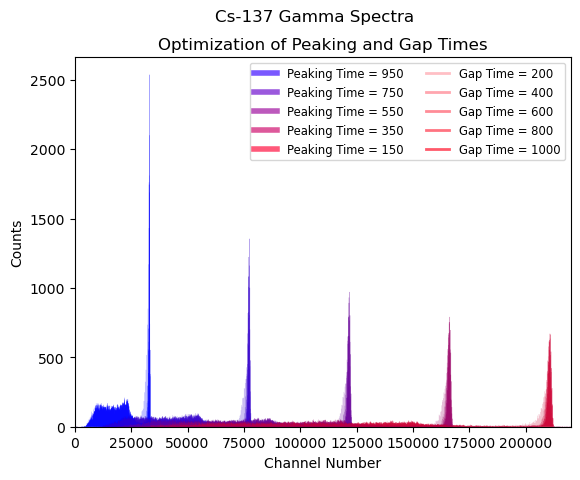

In [4]:
#Create a plot containing all the spectra that were calculated in the optimization procedure 
plt.figure()
plt.xlim(0, 220000)
plt.suptitle("Cs-137 Gamma Spectra")
plt.title("Optimization of Peaking and Gap Times")
plt.xlabel("Channel Number")
plt.ylabel("Counts")

m = []
k = []
for n in notebook.tqdm(range(5),leave = False):
    m_in = 200+ n*200
    m.append(m_in)
    for b in notebook.tqdm(range(5), leave = False):
        k_in = b*200 + 150
        k.append(k_in)
        temp = pd.read_csv("Cs137_2min_k{}m{}.csv".format(k_in,m_in))
        spectrum, bins = np.histogram(temp, bins=int(len(temp)/5), range=(0,800000))
        plt.hist(bins[:-1], bins, weights = spectrum, histtype='stepfilled', color = ((1/5)*(b),0,(1/5)*(5-b),(1/20)*(2*n+5)))

#customize legend
k_lines = [Line2D([0],[0], color = (1/5, 0, 5/5, 13/20), lw=4),
                Line2D([0],[0], color = (2/5, 0, 4/5, 13/20), lw=4), 
                Line2D([0],[0], color = (3/5, 0, 3/5, 13/20), lw=4),
                Line2D([0],[0], color = (4/5, 0, 2/5, 13/20), lw=4),
                Line2D([0],[0], color = (5/5, 0, 1/5, 13/20), lw=4),
                Line2D([0],[0], color = (5/5, 0, 1/10, 5/20), lw=2),
                Line2D([0],[0], color = (5/5, 0, 1/10, 7/20), lw=2),
                Line2D([0],[0], color = (5/5, 0, 1/10, 9/20), lw=2),
                Line2D([0],[0], color = (5/5, 0, 1/10, 11/20), lw=2),
                Line2D([0],[0], color = (5/5, 0, 1/10, 13/20), lw=2)]

plt.legend(k_lines, ['Peaking Time = 950', 
                     'Peaking Time = 750', 
                     'Peaking Time = 550', 
                     'Peaking Time = 350', 
                     'Peaking Time = 150',  
                    'Gap Time = 200', 
                    'Gap Time = 400',
                    'Gap Time = 600',
                    'Gap Time = 800',
                    'Gap Time = 1000'],
          fontsize='small', ncol=2)   
plt.show()

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

<Figure size 640x480 with 0 Axes>

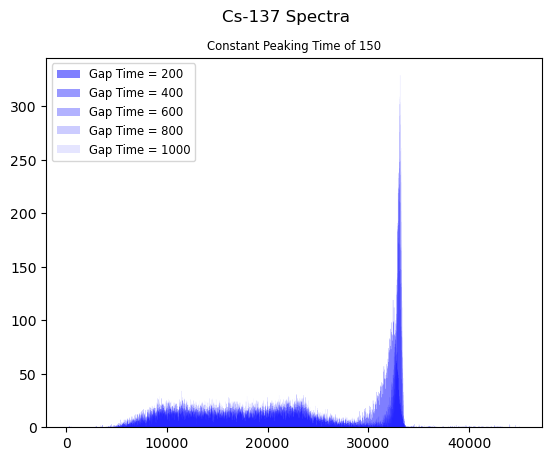

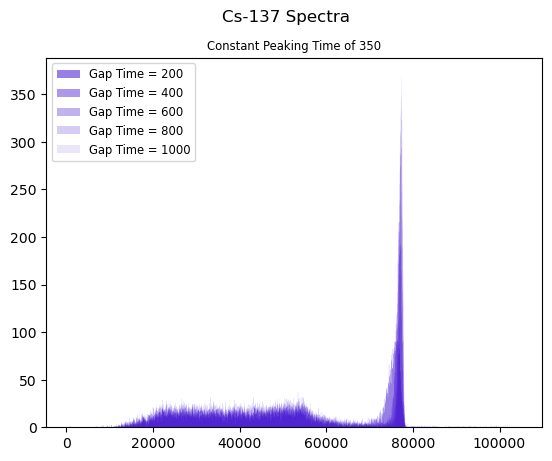

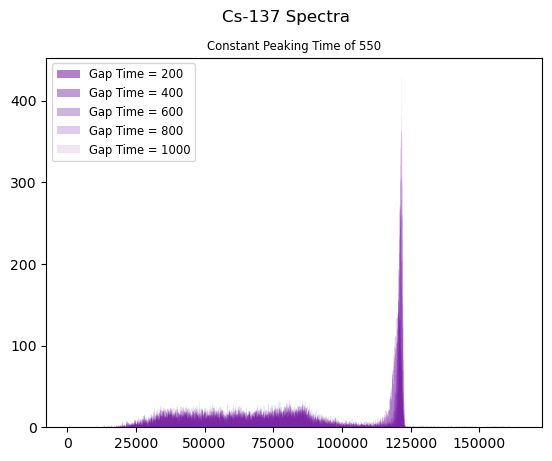

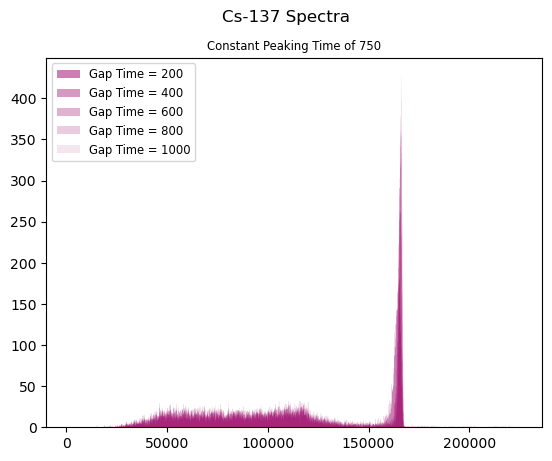

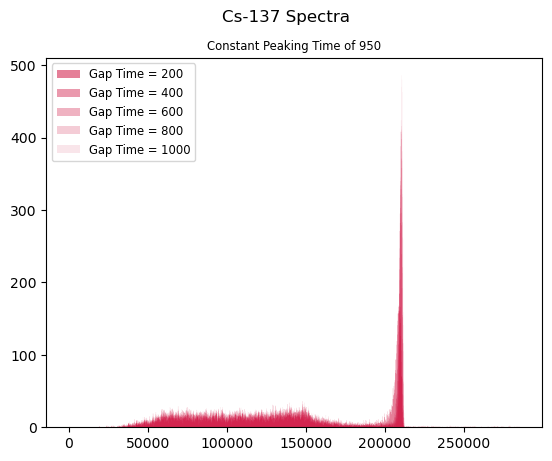

In [5]:
#Plotting the spectra according to peaking time since it looks like changing peaking time has an effect on channel
plt.figure()
spectra = []
bins_array = []
for b in notebook.tqdm(range(5),leave = False):
    k_in2 = b*200 + 150
    plt.figure()
    plt.suptitle("Cs-137 Spectra")
    plt.title("Constant Peaking Time of {}".format(k_in2), fontsize = 'small')
    for n in notebook.tqdm(range(5), leave = False):
        m_in2 = 200+ n*200
        f = pd.read_csv("Cs137_2min_k{}m{}.csv".format(k_in2,m_in2))
        f = np.array(f)
        badheights = []
        goodheights = []
        for i in range(len(f)):
            if f[i] > 2*np.mean(f):
                badheights.append(f[i])
            else:
                goodheights.append(f[i])
        spectrum, bins = np.histogram(goodheights, bins=int(len(goodheights)/10))
        bins_array.append(bins) 
        spectra.append(spectrum)
        values, bins_out, patches = plt.hist(bins[:-1], bins, weights = spectrum, histtype='stepfilled', color = ((1/5)*b, 0, (1/5)*(5-b), (1/20)*(-2*n+10)), 
                                             label = "Gap Time = {}".format(m_in2))
        del goodheights
        del badheights
    plt.legend(loc = 2, fontsize = 'small')

plt.show()

# Section 4: Analytical Comparison of Spectra
 - Here you manually find the optimal start and end channel for fitting a gaussian to the photopeak. Since the spectra with the same peaking times are around the same channels, I was able to find 5 sets of values for this instead of 25.
 
 - Once you find the start and end channels, fit the gaussian, and return the resolution of the photopeak.
 
 - The final plot shows the resolution of the photopeak vs the peaking (colors) and gap (ordinate) times

(89,) (89,)


C:\Users\megas\anaconda3\envs\NE204V1\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  
C:\Users\megas\anaconda3\envs\NE204V1\lib\site-packages\ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


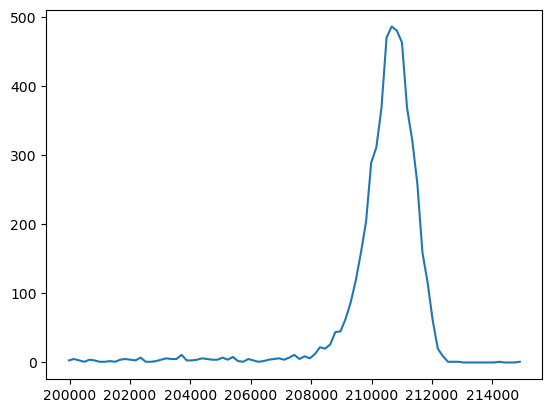

In [6]:
#Messing around with the bins array to find the correct fitting axis
bins_array = np.array(bins_array)
spectra = np.array(spectra)

m = 24
start_junk = np.argmin(np.abs(bins_array[m]-200000))
end_junk = np.argmin(np.abs(bins_array[m]-215000))

print(bins_array[m][start_junk:end_junk].shape, spectra[m][start_junk:end_junk].shape)
plt.plot(bins_array[m][start_junk:end_junk], spectra[m][start_junk:end_junk])

In [7]:
#Fit a gaussain to the photopeak  

#I went through each spectrum and in chunks of 5, these are the start and end for fitting a gaussian
st = [29000, 70000, 110000, 155000, 200000]
ed = [34000, 80000, 125000, 170000, 215000]

start = []
end = []
for n in range(25):
    i = int(n/5)
    start.append(np.argmin(np.abs(bins_array[n]-st[i])))
    end.append(np.argmin(np.abs(bins_array[n]-ed[i])))

start = np.array(start)
end = np.array(end)

In [8]:
#Finding the resolution of the photopeaks based on a guassian fit
res = []
for j in range(25):
    k = int(j/5)
#     plt.plot(bins_array[j][start[k]:end[k]], spectra[j][start[k]:end[k]])
    H, A, x0, sigma = gauss_fit(bins_array[j][start[k]:end[k]], spectra[j][start[k]:end[k]])
    res.append(((2.35482 * sigma)/x0)*100)

res = np.array(res)

(25,)


# Notes on the Outputs of the Gaussian Fit
 - The offset of the gaussian baseline is: H
 - The center of the gaussian fit is: x0
 - The sigma of the gaussian fit is: sigma
 - The maximum intensity of the gaussian fit is: H + A
 - The Amplitude of the gaussian fit is: A
 - The FWHM of the gaussian fit is: FWHM

In [14]:
#Determination of optimal peaking and gap time
opt = np.argmin(res)
maxres = np.amin(res)

print("The parameters of spectrum",opt,"have the best resolution and thus are the optimal peaking and gap times.")
print("The best resolution was: {} %".format(round(maxres,3)))

The parameters of spectrum 24 have the best resolution and thus are the optimal peaking and gap times.
The best resolution was: 0.767 %


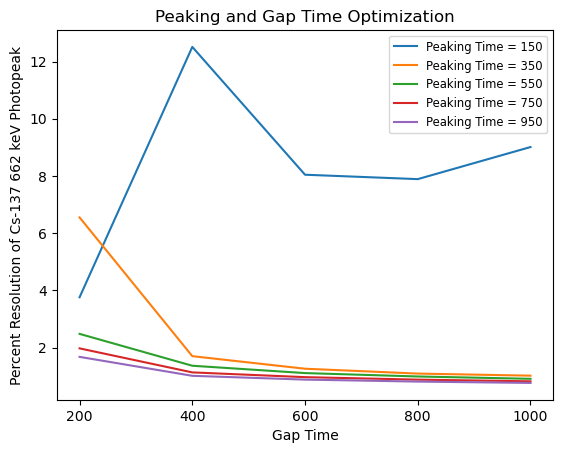

In [10]:
#Plotting the Resolutions
plt.figure()
plt.title("Peaking and Gap Time Optimization")
x = [0,1,2,3,4]
my_xtics = ['200','400','600','800','1000']
plt.xticks(x, my_xtics)
plt.ylabel("Percent Resolution of Cs-137 662 keV Photopeak")
plt.xlabel("Gap Time")
for i in range(5):
    a = 5*i
    b = 5*i+5
    plt.plot(res[a:b], label = "Peaking Time = {}".format(i*200+150))
    
plt.legend(fontsize = "small")